# Exercises

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
import pickle
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False})

### Exercise 1
---
Use the sklearn `make_blobs()` function, in the same way that we used in the lesson, to generate a *non linearly separable* dataset with 2 features.  
Fit a linear SVM to the dataset many times, varying the slack hyperparameter $C$, and calculate the model performance in classifying the data.  
What is, approximately, a the best value of the $C$ hyperparameter for this dataset?

In [43]:
X_nsep,y_nsep = make_blobs(n_samples=100,n_features =2,centers=[[-1,0],[1,0]],cluster_std=.8)

In [44]:
# First search on a large range of C
C = [0.001, 0.01, 0.1, 1, 10, 30, 50, 80, 100]

avg_performance = []
std_performance = []

# Repeat the cross-validation 50 times and find the average performance
repeat = 50

for c in C:

    kf = StratifiedKFold(n_splits=5,shuffle=True)
    fold_performance = []

    for n in range(repeat):

        for train_index, test_index in kf.split(X_nsep, y_nsep):
                
            X_train, X_test = X_nsep[train_index], X_nsep[test_index]
            y_train, y_test = y_nsep[train_index], y_nsep[test_index]

            clf = svm.LinearSVC(max_iter=1000, loss='hinge', C=float(c))
            clf.fit(X_train, y_train)
            fold_performance.append(clf.score(X_test,y_test))

    avg_performance.append(np.mean(fold_performance))
    std_performance.append(np.std(fold_performance))

avg_performance = np.asarray(avg_performance)
std_performance = np.asarray(std_performance)

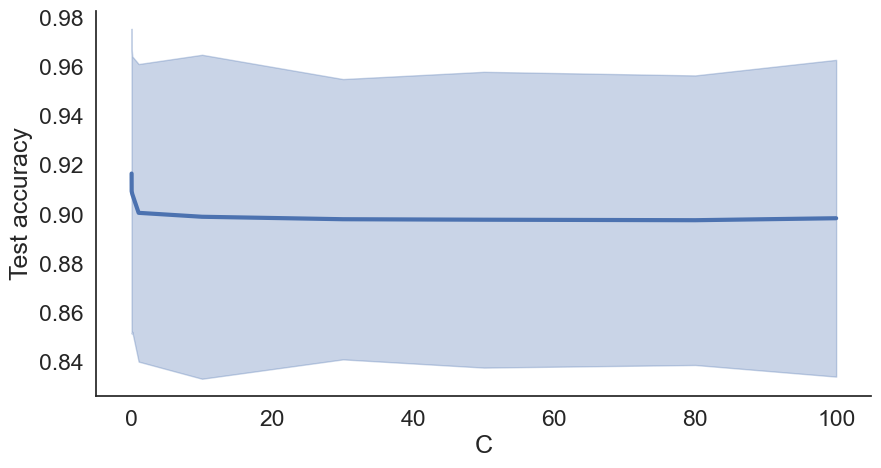

In [45]:
# Plot the test accuracy over C
plt.figure(figsize=(10,5))
plt.plot(C,avg_performance,'b',linewidth=3)
plt.fill_between(C, avg_performance-std_performance, avg_performance+std_performance, 
                 color='b', alpha=.3)
plt.xlabel('C')
plt.ylabel('Test accuracy')
plt.show()

In [46]:
# Smaller C values are better for this dataset; let's search around 0.01 to 1
C = np.linspace(0.001,1,200)

avg_performance = []
std_performance = []

# Repeat the cross-validation 50 times and find the average performance
repeat = 50

for c in C:

    kf = StratifiedKFold(n_splits=5,shuffle=True)
    fold_performance = []

    for n in range(repeat):

        for train_index, test_index in kf.split(X_nsep, y_nsep):
                
            X_train, X_test = X_nsep[train_index], X_nsep[test_index]
            y_train, y_test = y_nsep[train_index], y_nsep[test_index]

            clf = svm.LinearSVC(max_iter=1000, loss='hinge', C=float(c))
            clf.fit(X_train, y_train)
            fold_performance.append(clf.score(X_test,y_test))

    avg_performance.append(np.mean(fold_performance))
    std_performance.append(np.std(fold_performance))

avg_performance = np.asarray(avg_performance)
std_performance = np.asarray(std_performance)

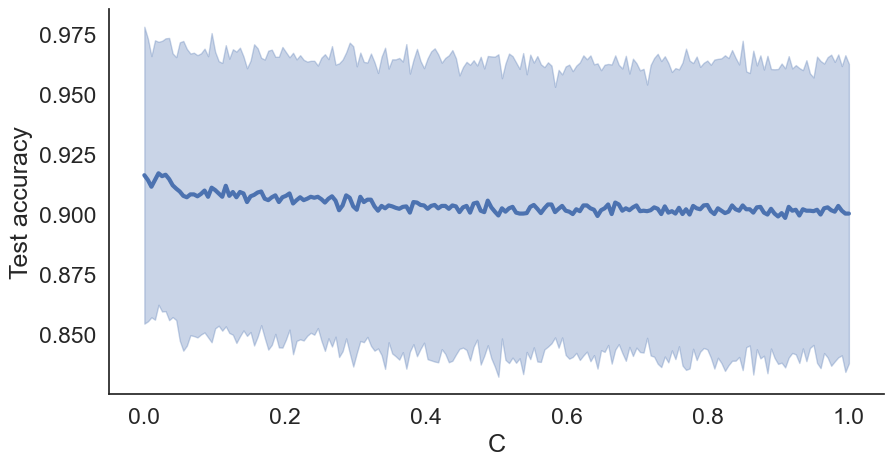

In [47]:
# Plot the test accuracy over C
plt.figure(figsize=(10,5))
plt.plot(C,avg_performance,'b',linewidth=3)
plt.fill_between(C, avg_performance-std_performance, avg_performance+std_performance, 
                 color='b', alpha=.3)
plt.xlabel('C')
plt.ylabel('Test accuracy')
plt.show()

<div class="alert alert-block alert-info">

**Report for Exercise 1**

A lower C value, which is about 0.001 according to the above search, seems to be the best for this dataset. But the differences caused by C values are not some large. A smaller C value makes sense because our data is rather noisy (std = 0.8), and lower C is more tolerant to classification errors caused by the noise and outliers (The strength of the regularization is *inversely* proportional to C).

### Exercise 2
---
Repeat exercise 1, but using a non-linear SVM model (the sklearn class `SVC` uses [Radial Basis Functions](https://en.wikipedia.org/wiki/Radial_basis_function) as a default, check its documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)). 
To have a fairer assessment of the performance, train the model on a fraction (e.g. 80%) of the data, and test it on the other 20%.
Compare the performance of a linear SVC and a RBF SVC for dataset that are increaslingly non-linearly-separable.


In [82]:
std_all = np.linspace(0.8,4,200)
# all_data = []
# for std in std_all:
#     X_nsep,y_nsep = make_blobs(n_samples=500,n_features =2,centers=[[-1,0],[1,0]],cluster_std=std)
#     all_data.append((X_nsep,y_nsep))

# # Save the data
# with open('data/simu_data_svm.pkl','wb') as f:
#     pickle.dump(all_data,f)

# Load the data
with open('data/simu_data_svm.pkl','rb') as f:
    all_data = pickle.load(f)

In [83]:
avg_performance_nonlinear = []
std_performance_nonlinear = []

# Repeat the cross-validation 30 times and find the average performance
repeat = 30

for n in range(len(all_data)):

    kf = StratifiedKFold(n_splits=5,shuffle=True)
    fold_performance = []

    for _ in range(repeat):

        for train_index, test_index in kf.split(all_data[n][0], all_data[n][1]):
                
            X_train, X_test = all_data[n][0][train_index], all_data[n][0][test_index]
            y_train, y_test = all_data[n][1][train_index], all_data[n][1][test_index]

            clf = svm.SVC(C=.001, kernel='rbf')
            clf.fit(X_train, y_train)
            fold_performance.append(clf.score(X_test,y_test))

    avg_performance_nonlinear.append(np.mean(fold_performance))
    std_performance_nonlinear.append(np.std(fold_performance))

avg_performance_nonlinear = np.asarray(avg_performance_nonlinear)
std_performance_nonlinear = np.asarray(std_performance_nonlinear)

In [84]:
avg_performance_linear = []
std_performance_linear = []

# Repeat the cross-validation 30 times and find the average performance
repeat = 30

for n in range(len(all_data)):

    kf = StratifiedKFold(n_splits=5,shuffle=True)
    fold_performance = []

    for _ in range(repeat):

        for train_index, test_index in kf.split(all_data[n][0], all_data[n][1]):
                
            X_train, X_test = all_data[n][0][train_index], all_data[n][0][test_index]
            y_train, y_test = all_data[n][1][train_index], all_data[n][1][test_index]

            clf = svm.SVC(C=.001, kernel='linear')
            clf.fit(X_train, y_train)
            fold_performance.append(clf.score(X_test,y_test))

    avg_performance_linear.append(np.mean(fold_performance))
    std_performance_linear.append(np.std(fold_performance))

avg_performance_linear = np.asarray(avg_performance_linear)
std_performance_linear = np.asarray(std_performance_linear)

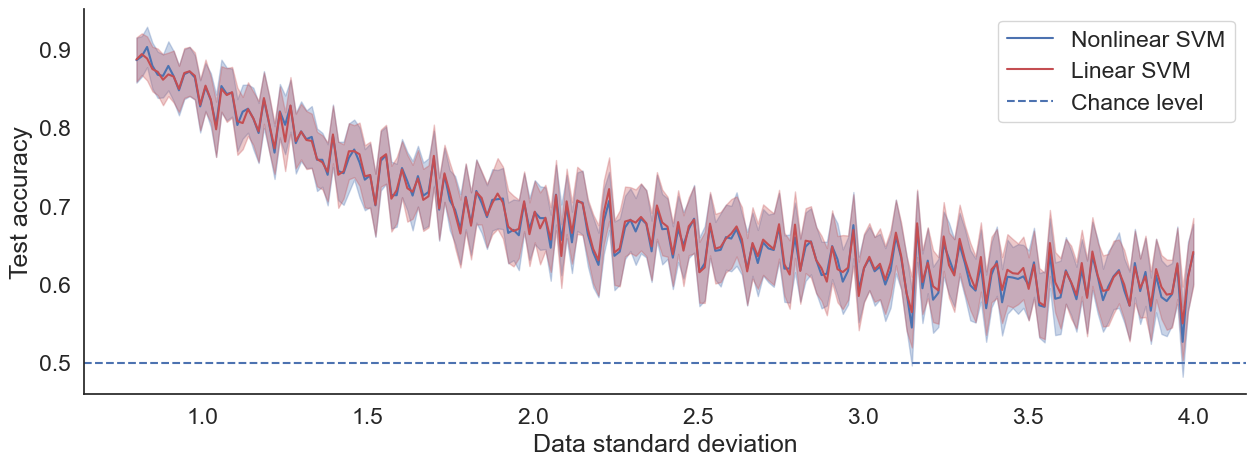

In [85]:
# Plot
plt.figure(figsize=(15,5))
fig1, = plt.plot(std_all, avg_performance_nonlinear, color='b', linewidth=1.5, label='Nonlinear SVM')    
plt.fill_between(std_all, avg_performance_nonlinear - std_performance_nonlinear,
                 avg_performance_nonlinear + std_performance_nonlinear, color='b', alpha=.3)

fig2, = plt.plot(std_all, avg_performance_linear, color='r', linewidth=1.5, label='Linear SVM')
plt.fill_between(std_all, avg_performance_linear - std_performance_linear,
                    avg_performance_linear + std_performance_linear, color='r', alpha=.3)

fig3 = plt.axhline(y=0.5,linestyle='--',label='Chance level')

plt.legend(handles=[fig1,fig2,fig3])
plt.xlabel('Data standard deviation')
plt.ylabel('Test accuracy')
plt.show()

<div class="alert alert-block alert-info">

**Report for Exercise 2**

As the data becomes more non-linear-separable (higher variance), performance of both linear and non-linear kernels decrease. For the datasets I generated, there is no strong evidence suggesting which kernel is better; their performances seem to co-vary.

### Exercise 3
---
Use the code below to simulate new data.
Generate data and then decode the stimulus identity, see how the decoding performance change when you change the following:

- The amplitude of the noise in the firing rate
- The amplitude of the stimulus modulation of the firing rate
- The number of neurons

Plot and comment.

In [8]:
# I modified the code because the provided version did not use the noise rate variable in simulation

def simu_spike(n_cells=20, sigma_stim=0.5, average_firing_rate=5, noise_rate=1):
# simulate spiking activity

    # generate baseline rates from exponential distirbution
    cell_rate_baseline = np.random.exponential(average_firing_rate,size=n_cells) + noise_rate

    # create stimulus average responses, perturbing the population firng rate profile
    # we use a multiplicative modulation in opposite directions for the two stimuli
    modulation = sigma_stim*np.random.normal(0,1,size=n_cells)
    cell_rate_stim = {1: cell_rate_baseline * (1+modulation),2:cell_rate_baseline * (1-modulation)}
    # sets negative firng rate to 0
    cell_rate_stim[1][cell_rate_stim[1]<0]=0
    cell_rate_stim[2][cell_rate_stim[2]<0]=0

    s_rate = 10000 # the sampling rate of our emulated recording system
    n_stim = 100 # number of stimuli

    stim_dur = 2 #stimulus duration (in seconds)
    is_interval = 3 # interval between stimuli  (in seconds)

    stim_onsets = np.arange(0,n_stim*(stim_dur+is_interval),(stim_dur+is_interval)) # onset time of each stimulus (in seconds)
    stim_type = np.asarray([1 for i in range(int(n_stim/2))]+[2 for i in range(int(n_stim/2))]) # identity of each stimulus
    np.random.shuffle(stim_type)

    time = np.arange(0,(n_stim+1)*(stim_dur+is_interval),1.0/s_rate) # vector of the sampled times.

    spike_times = []
    for cell in range(n_cells):
        spikes = np.random.poisson(cell_rate_baseline[cell]/s_rate,size=time.shape)
        for i,stimulus in enumerate(stim_type):
            stim_idxs = np.arange(stim_onsets[i]*s_rate,(stim_onsets[i]+stim_dur)*s_rate)
            spikes[stim_idxs] = np.random.poisson(cell_rate_stim[stimulus][cell]/s_rate,size=stim_idxs.shape)

        spike_times.append(time[spikes>0])

    return spike_times, stim_onsets, stim_type, stim_dur


In [21]:
# noise_rate = np.linspace(0.5,5,50)
# sigma_stim = np.linspace(0.5,5,50)
# n_cells = np.linspace(20,100,50).astype(int)

# all_spike = []
# all_onsets = []
# all_type = []
# all_dur = []
# for noise in noise_rate:
#     spike_times, stim_onsets, stim_type, stim_dur = simu_spike(noise_rate=noise)
#     all_spike.append(spike_times)
#     all_onsets.append(stim_onsets)
#     all_type.append(stim_type)
#     all_dur.append(stim_dur)

# out_dict = {'spike_times':all_spike,
#             'stim_onsets':all_onsets,
#             'stim_type':all_type,
#             'stim_duration':all_dur
#             }
# with open('data/simulated_data_diff_noise.pickle', 'wb') as handle:
#     pickle.dump(out_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

# all_spike = []
# all_onsets = []
# all_type = []
# all_dur = []
# for sigma in sigma_stim:
#     spike_times, stim_onsets, stim_type, stim_dur = simu_spike(sigma_stim=sigma)
#     all_spike.append(spike_times)
#     all_onsets.append(stim_onsets)
#     all_type.append(stim_type)
#     all_dur.append(stim_dur)

# out_dict = {'spike_times':all_spike,
#             'stim_onsets':all_onsets,
#             'stim_type':all_type,
#             'stim_duration':all_dur
#             }
# with open('data/simulated_data_diff_sigma.pickle', 'wb') as handle:
#     pickle.dump(out_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

# all_spike = []
# all_onsets = []
# all_type = []
# all_dur = []
# for n in n_cells:
#     spike_times, stim_onsets, stim_type, stim_dur = simu_spike(n_cells=int(n))
#     all_spike.append(spike_times)
#     all_onsets.append(stim_onsets)
#     all_type.append(stim_type)
#     all_dur.append(stim_dur)

# out_dict = {'spike_times':all_spike,
#             'stim_onsets':all_onsets,
#             'stim_type':all_type,
#             'stim_duration':all_dur
#             }
# with open('data/simulated_data_diff_ncells.pickle', 'wb') as handle:
#     pickle.dump(out_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [22]:
# Load data
with open('data/simulated_data_diff_noise.pickle', 'rb') as handle:
    data = pickle.load(handle)
all_spike_times_noise = data['spike_times']
all_stim_onsets_noise = data['stim_onsets']
all_stim_type_noise = data['stim_type']
all_stim_duration_noise = data['stim_duration']

with open('data/simulated_data_diff_sigma.pickle', 'rb') as handle:
    data = pickle.load(handle)
all_spike_times_sigma = data['spike_times']
all_stim_onsets_sigma = data['stim_onsets']
all_stim_type_sigma = data['stim_type']
all_stim_duration_sigma = data['stim_duration']

with open('data/simulated_data_diff_ncells.pickle', 'rb') as handle:
    data = pickle.load(handle)
all_spike_times_ncells = data['spike_times']
all_stim_onsets_ncells = data['stim_onsets']
all_stim_type_ncells = data['stim_type']
all_stim_duration_ncells = data['stim_duration']

In [23]:
def preprocess(all_spike_times, all_stim_onsets, all_stim_type, all_stim_duration):
    all_X = []
    for n in range(len(all_spike_times)):
        spike_times = all_spike_times[n]
        stim_onsets = all_stim_onsets[n]
        stim_type = all_stim_type[n]
        stim_duration = all_stim_duration[n]

        onset = 0 # in seconds before stimulus onset
        offset = 0 # in second after stimulus offset

        binwidth = 0.1 # in seconds (100 ms)
        bins = np.arange(-onset,stim_duration+offset+binwidth,binwidth)

        n_cells = len(spike_times)
        n_trials= len(stim_type)

        X = np.zeros((n_cells,n_trials,len(bins)-1));
        for cell in range(n_cells):    
            for trial in range(n_trials):

                # selects spikes that are in trial
                sp_idx = np.logical_and(spike_times[cell]>stim_onsets[trial]-onset,
                        spike_times[cell]<stim_onsets[trial]+stim_duration+offset)
                
                # centers spike times around stimulus onset
                sp_cntr = spike_times[cell][sp_idx]-stim_onsets[trial]
                #bins spikes
                spike_count,_ = np.histogram(sp_cntr,bins)
                #spike_count = zscore(spike_count)
                X[cell,trial,:] = spike_count
        all_X.append(X)

    return all_X

In [24]:
all_X_noise = preprocess(all_spike_times_noise, all_stim_onsets_noise, all_stim_type_noise, all_stim_duration_noise)
all_X_sigma = preprocess(all_spike_times_sigma, all_stim_onsets_sigma, all_stim_type_sigma, all_stim_duration_sigma)
all_X_ncells = preprocess(all_spike_times_ncells, all_stim_onsets_ncells, all_stim_type_ncells, all_stim_duration_ncells)

In [25]:
n_splits = 10

avg_performance_noise = []
avg_performance_sigma = []
avg_performance_ncells = []

for i, X in enumerate(all_X_noise):
    stim_type = all_stim_type_noise[i]
    stim_performance = []
    
    for time_bin in range(X.shape[-1]):
        # setting 2-fold cross validation
        kf = StratifiedKFold(n_splits=n_splits,shuffle=True)
        fold_performance = []

        for train_index, test_index in kf.split(X[:,:,time_bin].T,stim_type):
        
            X_train, X_test = X[:,train_index,time_bin].T, X[:,test_index,time_bin].T
            y_train, y_test = stim_type[train_index], stim_type[test_index]

            clf = svm.SVC()
            clf.fit(X_train, y_train)
            fold_performance.append(clf.score(X_test,y_test))

        stim_performance.append(np.mean(fold_performance))
    
    avg_performance_noise.append(np.mean(stim_performance))

for i, X in enumerate(all_X_sigma):
    stim_type = all_stim_type_sigma[i]
    stim_performance = []
    
    for time_bin in range(X.shape[-1]):
        # setting 2-fold cross validation
        kf = StratifiedKFold(n_splits=n_splits,shuffle=True)
        fold_performance = []

        for train_index, test_index in kf.split(X[:,:,time_bin].T,stim_type):
        
            X_train, X_test = X[:,train_index,time_bin].T, X[:,test_index,time_bin].T
            y_train, y_test = stim_type[train_index], stim_type[test_index]

            clf = svm.SVC()
            clf.fit(X_train, y_train)
            fold_performance.append(clf.score(X_test,y_test))

        stim_performance.append(np.mean(fold_performance))
    
    avg_performance_sigma.append(np.mean(stim_performance))

for i, X in enumerate(all_X_ncells):
    stim_type = all_stim_type_ncells[i]
    stim_performance = []
    
    for time_bin in range(X.shape[-1]):
        # setting 2-fold cross validation
        kf = StratifiedKFold(n_splits=n_splits,shuffle=True)
        fold_performance = []

        for train_index, test_index in kf.split(X[:,:,time_bin].T,stim_type):
        
            X_train, X_test = X[:,train_index,time_bin].T, X[:,test_index,time_bin].T
            y_train, y_test = stim_type[train_index], stim_type[test_index]

            clf = svm.SVC()
            clf.fit(X_train, y_train)
            fold_performance.append(clf.score(X_test,y_test))

        stim_performance.append(np.mean(fold_performance))
    
    avg_performance_ncells.append(np.mean(stim_performance))

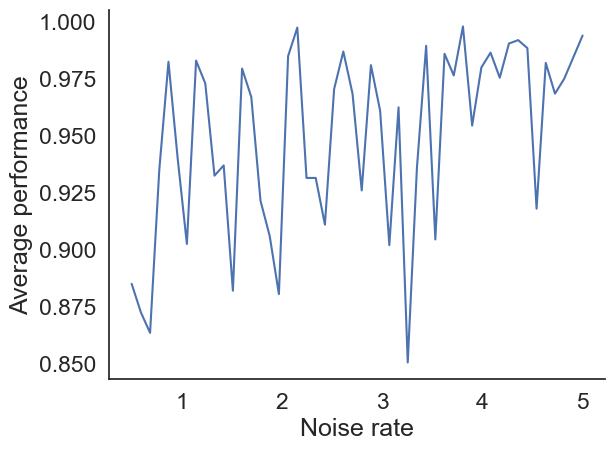

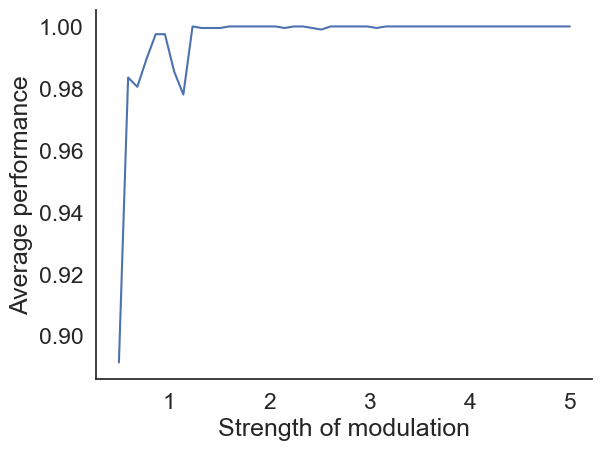

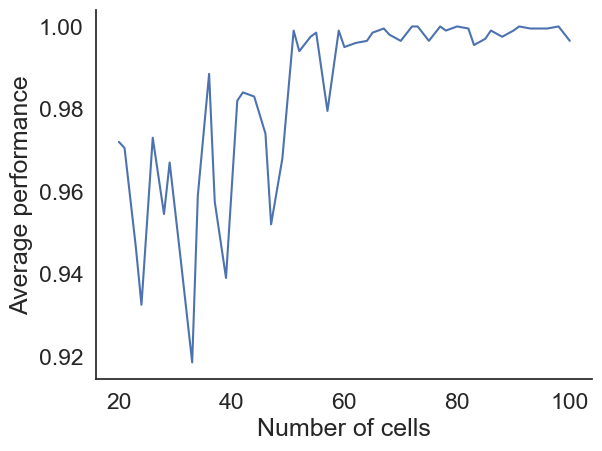

In [27]:
noise_rate = np.linspace(0.5,5,50)
sigma_stim = np.linspace(0.5,5,50)
n_cells = np.linspace(20,100,50).astype(int)

plt.plot(noise_rate, avg_performance_noise)
plt.xlabel('Noise rate')
plt.ylabel('Average performance')
plt.show()

plt.plot(sigma_stim, avg_performance_sigma)
plt.xlabel('Strength of modulation')
plt.ylabel('Average performance')
plt.show()

plt.plot(n_cells, avg_performance_ncells)
plt.xlabel('Number of cells')
plt.ylabel('Average performance')
plt.show()

<div class="alert alert-block alert-info">

**Report for Exercise 3**

With a non-linear SVM, the average performance seems to increase with strength of stimulus modulation and number of cells. These findings are as expected, because with higher stimulus modulation, the distinction between two types of stimuli is more clear, and with more neurons, there is more data for training.

For the baseline noise, there seems no clear relationship between it and decoding performance (maybe there is a slow upward drifting). Probably changing baseline noise only shifts the data points without largely impacting the performance of decoding.

## Useful code
---


In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [60]:
n_cells = 20; # number of cells to simulate
n_stim_type = 2; # number of different stimuli
sigma_stim = 0.5 # amplitude of stimulus related modulation
average_firing_rate = 5; # average firing rate across the population
noise_rate = 1 # we are going to add some spike noise non related to the task

In [86]:
def simu_spike(n_cells=20, sigma_stim=0.5, average_firing_rate=5, noise_rate=1):
# simulate spiking activity

    # generate baseline rates from exponential distirbution
    cell_rate_baseline = np.random.exponential(average_firing_rate,size=n_cells) + noise_rate

    # create stimulus average responses, perturbing the population firng rate profile
    # we use a multiplicative modulation in opposite directions for the two stimuli
    modulation = sigma_stim*np.random.normal(0,1,size=n_cells)
    cell_rate_stim = {1: cell_rate_baseline * (1+modulation),2:cell_rate_baseline * (1-modulation)}
    # sets negative firng rate to 0
    cell_rate_stim[1][cell_rate_stim[1]<0]=0
    cell_rate_stim[2][cell_rate_stim[2]<0]=0

    s_rate = 10000 # the sampling rate of our emulated recording system
    n_stim = 100 # number of stimuli

    stim_dur = 2 #stimulus duration (in seconds)
    is_interval = 3 # interval between stimuli  (in seconds)

    stim_onsets = np.arange(0,n_stim*(stim_dur+is_interval),(stim_dur+is_interval)) # onset time of each stimulus (in seconds)
    stim_type = np.asarray([1 for i in range(int(n_stim/2))]+[2 for i in range(int(n_stim/2))]) # identity of each stimulus
    np.random.shuffle(stim_type)

    time = np.arange(0,(n_stim+1)*(stim_dur+is_interval),1.0/s_rate) # vector of the sampled times.

    spike_times = []
    for cell in range(n_cells):
        spikes = np.random.poisson(cell_rate_baseline[cell]/s_rate,size=time.shape)
        for i,stimulus in enumerate(stim_type):
            stim_idxs = np.arange(stim_onsets[i]*s_rate,(stim_onsets[i]+stim_dur)*s_rate)
            spikes[stim_idxs] = np.random.poisson(cell_rate_stim[stimulus][cell]/s_rate,size=stim_idxs.shape)

        spike_times.append(time[spikes>0])

    return spike_times, stim_onsets, stim_type, stim_dur


In [73]:
# save ouput
out_dict = {'spike_times':spike_times,
            'stim_onsets':stim_onsets,
            'stim_type':stim_type,
            'stim_duration':stim_dur
            }

with open('data/simulated_data1.pickle', 'wb') as handle:
    pickle.dump(out_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
